# Weighted sample of fiction

What if we selected titles proportional to their representation in the library? Instead of giving each title the same chance to be selected, we could give chances proportional to the number of contemporary copies in Hathi, where "contemporary" means "within 25 years of first appearance."

In [10]:
# first, we "import" some modules we'll be using

import pandas as pd
import random
from collections import Counter
import numpy as np

Now actually read in the metadata.

In [3]:
meta = pd.read_csv('../noveltmmeta/workmeta.tsv', sep = '\t', low_memory = False)
meta.head()

,docid,oldauthor,author,authordate,inferreddate,latestcomp,datetype,startdate,enddate,imprint,...,recordid,instances,allcopiesofwork,copiesin25yrs,enumcron,volnum,title,parttitle,earlyedition,shorttitle
0,mdp.39015031913893,"Spencer, Louise Reid","Spencer, Louise Reid",NaN,0,2100,|,||||,||||,Thomas Y. Crowell company|1945,...,8744,1,1,1,NaN,NaN,Guerrilla wife | $c: [by] Louise Reid Spencer.,NaN,True,Guerrilla wife
1,mdp.39015003936864,"Baker, Robert H","Baker, Robert H",NaN,0,2100,n,,,"Port Washington, N.Y.|Ashley Books|197-?].",...,39757,1,1,1,NaN,NaN,The suburbs : | a novel / | $c: by Robert H. B...,NaN,True,The suburbs : a novel
2,mdp.39015068342305,"Dickens, Charles","Dickens, Charles",1812-1870.,0,1870,n,,,New York|The American news company|n.d.,...,119996,1,1,1,NaN,NaN,Edwin Drood. | $c: By Charles Dickens. With il...,NaN,True,Edwin Drood
3,mdp.39015055066586,"Stretton, Hesba","Stretton, Hesba",1832-1911.,0,1911,n,,,"New York|Dodd, Mead & co.|n.d.",...,122460,1,1,1,NaN,NaN,"Carola, | $c: by Hesba Stretton.",NaN,True,Carola
4,mdp.39015055066594,"Stretton,Hesba","Stretton, Hesba",1832-1911.,0,1911,n,,,"New York|Dodd, Mead & co.|n.d.",...,122464,1,1,1,NaN,NaN,In prison & out. | $c: By Hesba Stretton.,NaN,True,In prison & out


In [4]:
meta.shape


(138137, 28)

Let's only use volumes that are published near their author's lifespan.

In [5]:
meta = meta.loc[meta.earlyedition == True, : ]
meta.shape

(129023, 28)

### Histogram by number of copies

In [8]:
# To go through a pandas dataframe row by row, you can use the .iterrows() method.

bycopies = meta.groupby('copiesin25yrs').agg({'docid': 'count'})
bycopies.head()


,docid
copiesin25yrs,
1,88077
2,23147
3,10290
4,3317
5,1598


In [13]:
totalcopies = []
for idx, row in bycopies.iterrows():
    copies = int(idx) * row['docid']
    totalcopies.append(copies)
totalcopies = np.array(totalcopies) / np.sum(totalcopies)
bycopies = bycopies.assign(totalcopies = totalcopies)

cumulativeprob = []
cumulate = 0
for idx, row in bycopies.iterrows():
    cumulate += row['totalcopies']
    cumulativeprob.append(cumulate)
    
bycopies = bycopies.assign(cumulative = cumulativeprob)
bycopies

,docid,totalcopies,cumulative
copiesin25yrs,,,
1,88077,0.423297,0.423297
2,23147,0.222488,0.645785
3,10290,0.148361,0.794145
4,3317,0.063766,0.857911
5,1598,0.038400,0.896311
6,1048,0.030220,0.926531
7,466,0.015677,0.942208
8,308,0.011842,0.954050
9,210,0.009083,0.963133


In [14]:
first = pd.read_csv('firstsample.tsv', sep = '\t')
first.shape

(2730, 28)

In [15]:
firstbycopies = first.groupby('copiesin25yrs').agg({'docid': 'count'})
firstbycopies

,docid
copiesin25yrs,
1,1655
2,489
3,330
4,126
5,34
6,33
7,28
8,9
9,6


In [27]:
copycounts = []
cumulist = list(bycopies.cumulative)
for i in range(0, 2730):
    prob = random.uniform(0, 1)
    n = next(x[0] for x in enumerate(cumulist) if x[1] > prob)
    copycounts.append(n + 1)

xs = []
ys = []
proportional = Counter(copycounts)
for n in range(1, 30):
    print(n, proportional[n])
    xs.append(n)
    ys.append(proportional[n])

1 1159
2 598
3 401
4 174
5 99
6 84
7 50
8 35
9 25
10 20
11 11
12 18
13 8
14 5
15 6
16 7
17 0
18 3
19 5
20 10
21 2
22 1
23 0
24 2
25 0
26 2
27 0
28 2
29 0


In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

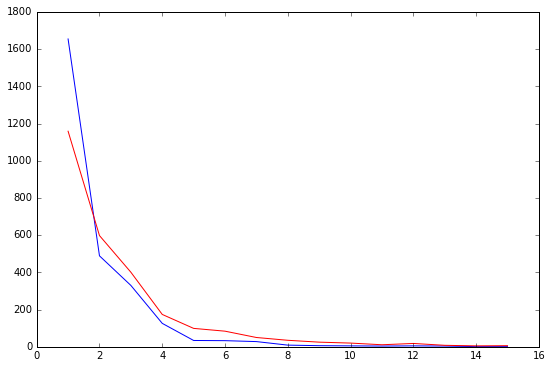

In [40]:
plt.plot([x+1 for x in range(15)], firstbycopies['docid'])
plt.plot(xs[0:15], ys[0:15], color = 'r')
plt.show()

In [33]:
needed = dict()
for i in range(2, 21):
    if i in firstbycopies.index:
        needed[i] = ys[i-1] - firstbycopies.loc[i, 'docid']
    else:
        needed[i] = ys[i-1]

for i in range(2, 21):
    print(i, needed[i])

2 109
3 71
4 48
5 65
6 51
7 22
8 26
9 19
10 15
11 7
12 13
13 4
14 5
15 5
16 6
17 0
18 3
19 5
20 10


In [34]:
remaining = set(meta.docid) - set(first.docid)
len(remaining)

126293

In [35]:
meta.set_index('docid', inplace = True)
left = meta.loc[remaining, : ]
left.shape

(126293, 27)

In [36]:
def extract_decade(date):
    decade = 10* (date // 10)
    return decade

left = left.assign(dec = left.inferreddate.map(extract_decade))

#### A little visualization

What's the date distribution of these volumes, by the way?

We can find out by counting the number of volumes in each "file drawer."

First we'll import a modules that's useful for plotting graphs. Then we'll go year by year from 1800 to 2009. We'll create a list of x coordinates that is simply the list of years, and a list of y coordinates that is the number of volumes in that year. The we just scatter plot (x, y).

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

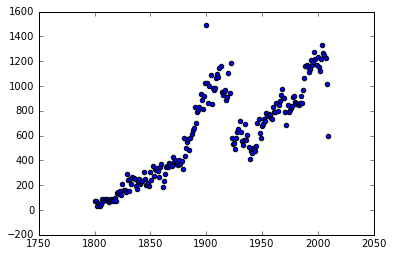

In [13]:
x = []
y = []
for year in range(1800, 2010):
    x.append(year)
    y.append(len(bydate[year]))
plt.scatter(x, y)
plt.show()

You can see that the advent of copyright at 1923 makes a big difference in the size of the collection. I'm not exactly sure why; our collection is not limited to public-domain works. But possibly libraries have been less enthusiastic about digitizing fiction when it can't be made publicly available.

We're going to flatten that out and select an evenly-distributed sample.

#### okay, let's finally select volumes

I'm going to go year by year. From the file drawer for each year (```bydate[year]```) I'm going to draw thirteen books.

Then I'll add them to a constantly-growing list called ```selected.```

Notice how this echoes the counting strategy. Create a counter outside the loop; set it to zero; then loop through a sequence and add one to the counter ... Here we're extending a list instead of adding to a counter.

In [14]:
selected = list()

for yr in range(1800, 2010):
    selected.extend(random.sample(bydate[yr], 13))

print(len(selected))

2730


Once we have a list of document ids we want to select, we can use them to extract the relevant rows from the table ```meta.```

In [15]:
# To create a table limited to those document ids, we can just use the "docid"
# column to *index* meta

meta.set_index('docid', inplace = True)

# and then select those rows

our_meta = meta.loc[selected, : ]
our_meta.shape

(2730, 27)

Now actually write that to disk.

In [16]:
our_meta.to_csv('firstsample.tsv', sep = '\t')

But in exploring this data with you, I quickly found that 28 full-width columns are overwhelming. So let's select a smaller set of twelve columns, and truncate some of them at 25 or 50 characters.

In [47]:
def truncate25(afield):
    if pd.isnull(afield):
        return ''
    elif len(afield) <= 25:
        return afield
    else:
        return afield[0:25]

def shrinkframe(indf):
    df = indf.copy()
    df.reset_index(inplace = True)
    newdf = df[['docid', 'author', 'authordate', 'inferreddate', 'latestcomp', 'allcopiesofwork', 'copiesin25yrs', 'enumcron']]
    newdf = newdf.assign(imprint = df.imprint.map(truncate25))
    newdf = newdf.assign(genres = df.genres.map(truncate25))
    newdf = newdf.assign(subjects = df.subjects.map(truncate25))
    newdf = newdf.assign(shorttitle = df.shorttitle)
    newdf = newdf.assign(realname = '')
    newdf = newdf.assign(pseudonym = '')
    newdf = newdf.assign(category = '')
    newdf = newdf.assign(firstpub = '')
    newdf = newdf.assign(realname = '')
    newdf = newdf.assign(gender = '')
    newdf = newdf.assign(nationality = '')
    newdf = newdf[['docid', 'author', 'realname', 'pseudonym', 'gender', 'nationality', 'authordate', 
                   'inferreddate', 'firstpub', 'latestcomp', 'allcopiesofwork', 'copiesin25yrs',
                   'enumcron', 'imprint', 'genres', 'subjects', 'category', 'shorttitle']]
    
    return newdf

shrunk = shrinkframe(our_meta)
print(shrunk.shape)
shrunk.head()

(2730, 18)


,docid,author,realname,pseudonym,gender,nationality,authordate,inferreddate,firstpub,latestcomp,allcopiesofwork,copiesin25yrs,enumcron,imprint,genres,subjects,category,shorttitle
0,nyp.33433074911573,"Smith, Charlotte Turner",,,,,1749-1806.,1800,,1800,1,1,v. 4,London;Printed by and for,Fiction,English fiction,,The Hungarian
1,nyp.33433074911581,"Smith, Charlotte Turner",,,,,1749-1806.,1800,,1800,1,1,v. 5,London;Printed by and for,Fiction,English fiction,,The Hungarian (con't.) Leonora. Guilelmine de...
2,njp.32101037604772,"Du Bois, Edward",,,,,1774-1850.,1800,,1800,1,1,NaN,London;Printed for J. Wri,Fiction,"Godwin, William|1756-1836",,"St. Godwin: a tale of the sixteenth, seventeen..."
3,hvd.hn2he3,"Kendall, Edward Augustus",,,,,1776?-1842.,1800,,1800,1,1,NaN,London;Printed for E. New,Juvenile audience|Fiction,Conduct of life|Children',,"The stories of Senex, or, Little histories of ..."
4,hvd.hn2he5,NaN,,,,,NaN,1800,,1800,1,1,NaN,London;Printed for Vernor,Fiction,,,"The Governess, or, Evening amusements at a boa..."


Now we need to divide this dataframe into three parts for the three of us. I'm giving 1200 rows to both of you, and taking 330 rows for myself as a sample, so I know what kind of problems you're encountering.

#### divide in three parts

We start by shuffling the index of our_meta, which is just a numeric index right now.

In [37]:
indices = our_meta.index.tolist()
random.shuffle(indices)
indices[0:20]

[2230,
 241,
 61,
 1823,
 559,
 1494,
 344,
 994,
 72,
 1604,
 713,
 29,
 721,
 2311,
 2006,
 1244,
 506,
 1890,
 1412,
 1582]

Then divide that random sequence into chunks like so:

In [38]:
forjessica = indices[0: 1200]
forpatrick = indices[1200: 2400]
forted = indices[2400 : ]

In [48]:
teddf = shrinkframe(our_meta.loc[forted, ])
teddf.to_csv('ted.tsv', sep = '\t', index = False)

In [49]:
jessdf = shrinkframe(our_meta.loc[forjessica, ])
jessdf.to_csv('jessica.tsv', sep = '\t', index = False)

In [50]:
patdf = shrinkframe(our_meta.loc[forpatrick, ])
patdf.to_csv('patrick.tsv', sep = '\t', index = False)

### Sanity checks

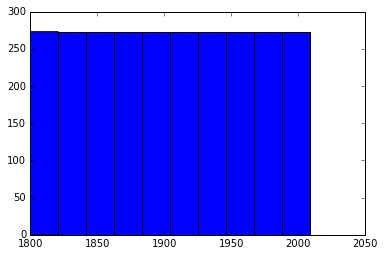

In [51]:
plt.hist(our_meta.inferreddate)
plt.show()

Good. even distribution across time

In [52]:
max(our_meta.inferreddate)

2009

In [53]:
min(our_meta.inferreddate)

1800